Mean Squared Error: 554.8075658541725
R-squared: 0.5138277027765878


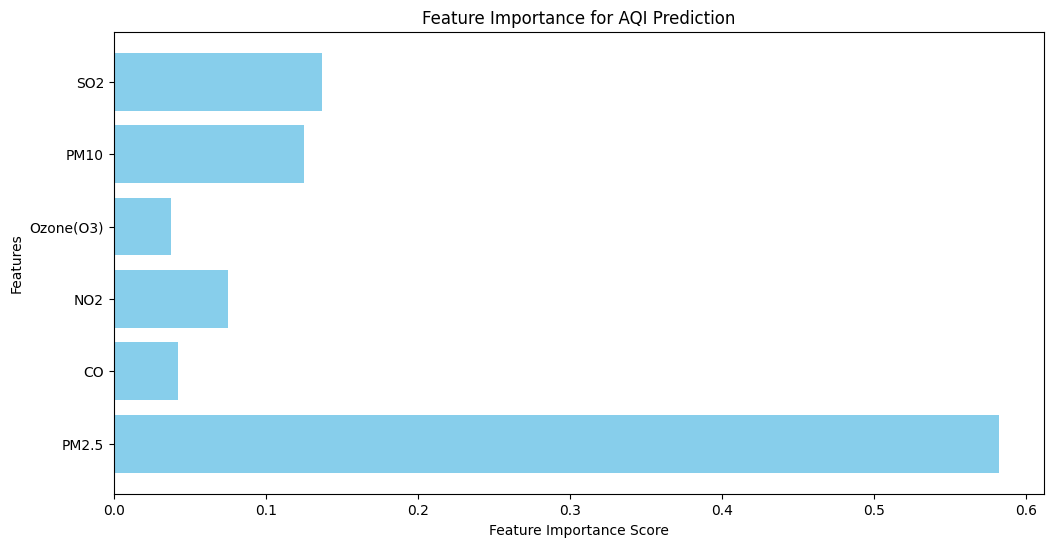

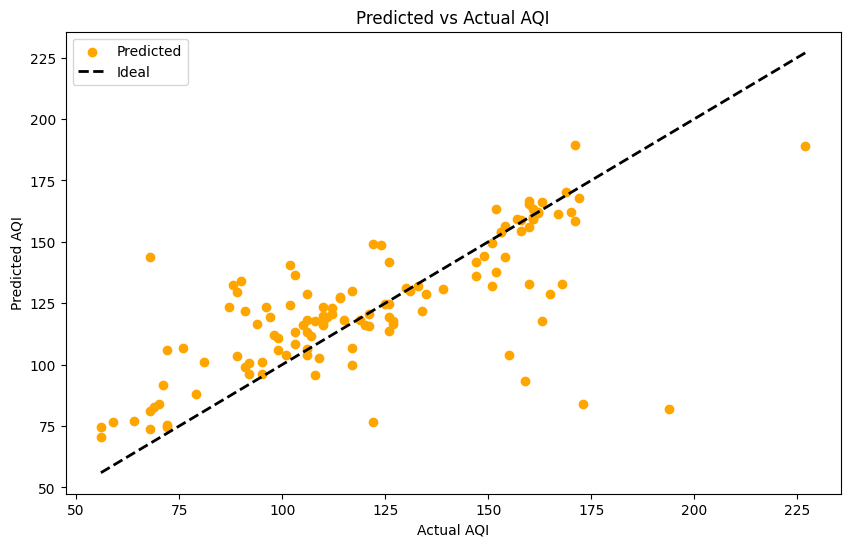

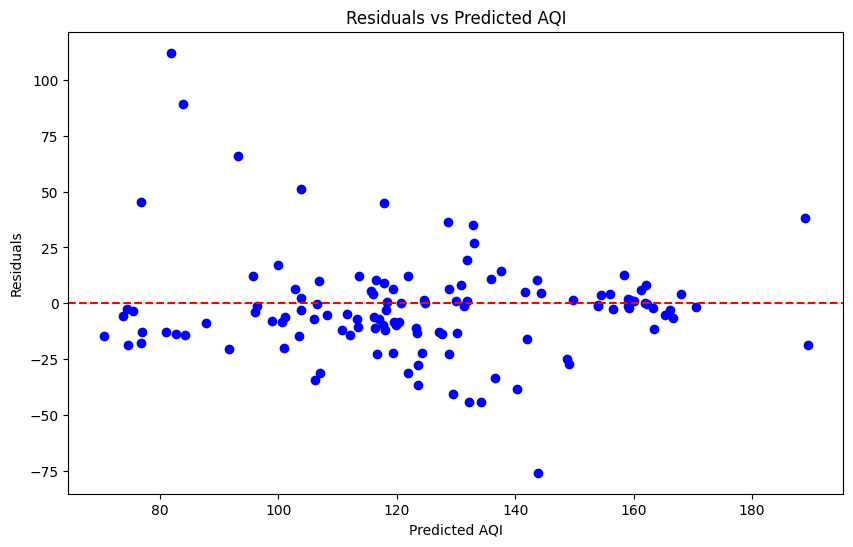

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess data
data = pd.read_csv('/Users/samikazi/Desktop/CSE499A - Dhaka1.csv')

# Drop NaN values
data.dropna(inplace=True)

# Remove commas and convert relevant columns to float
data['PM2.5'] = data['PM2.5'].str.replace(',', '').astype(float)
data['PM10'] = data['PM10'].str.replace(',', '').astype(float)

# Check for any additional conversion issues
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')
data['PM10'] = pd.to_numeric(data['PM10'], errors='coerce')

# Drop rows with NaN values after conversion
data.dropna(inplace=True)

# Feature and target variable
X = data.drop(['AQI', 'Date', 'Time'], axis=1)  # Exclude non-numeric columns
y = data['AQI']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

# Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns

# Feature Importance Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for AQI Prediction')
plt.show()

# Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted AQI')
plt.show()
